In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [5]:
df = pd.read_csv('../data/Churn_Modelling.csv')

In [7]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
df.value_counts()

RowNumber  CustomerId  Surname     CreditScore  Geography  Gender  Age  Tenure  Balance    NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited
1          15634602    Hargrave    619          France     Female  42   2       0.00       1              1          1               101348.88        1         1
6671       15667932    Bellucci    758          Spain      Female  43   10      0.00       2              1          1               55313.44         0         1
6664       15766185    She         850          Germany    Male    31   4       146587.30  1              1          1               89874.82         0         1
6665       15667632    Birdseye    703          France     Female  42   7       0.00       2              0          1               72500.68         0         1
6666       15599024    Hope        506          Spain      Male    32   8       0.00       2              0          1               182692.80        0         1
                                 

In [13]:
df.shape

(10000, 14)

In [15]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [17]:
df.describe(include='all')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


Text(0.5, 0.98, 'Churn Rate: ~20% (Class Imbalance Present)')

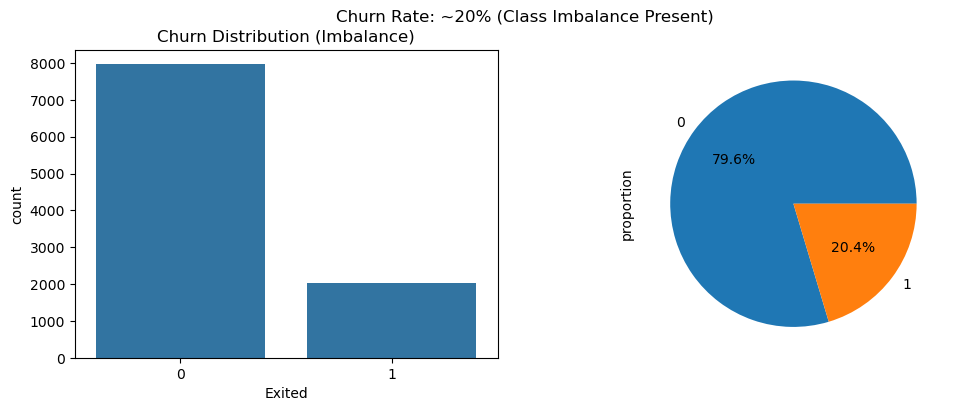

In [37]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.countplot(x='Exited', data=df, ax=ax[0])
ax[0].set_title("Churn Distribution (Imbalance)")
df['Exited'].value_counts(normalize=True).plot.pie(autopct='%1.1f%%', ax=ax[1])
plt.suptitle("Churn Rate: ~20% (Class Imbalance Present)")

<Axes: xlabel='NumOfProducts', ylabel='Exited'>

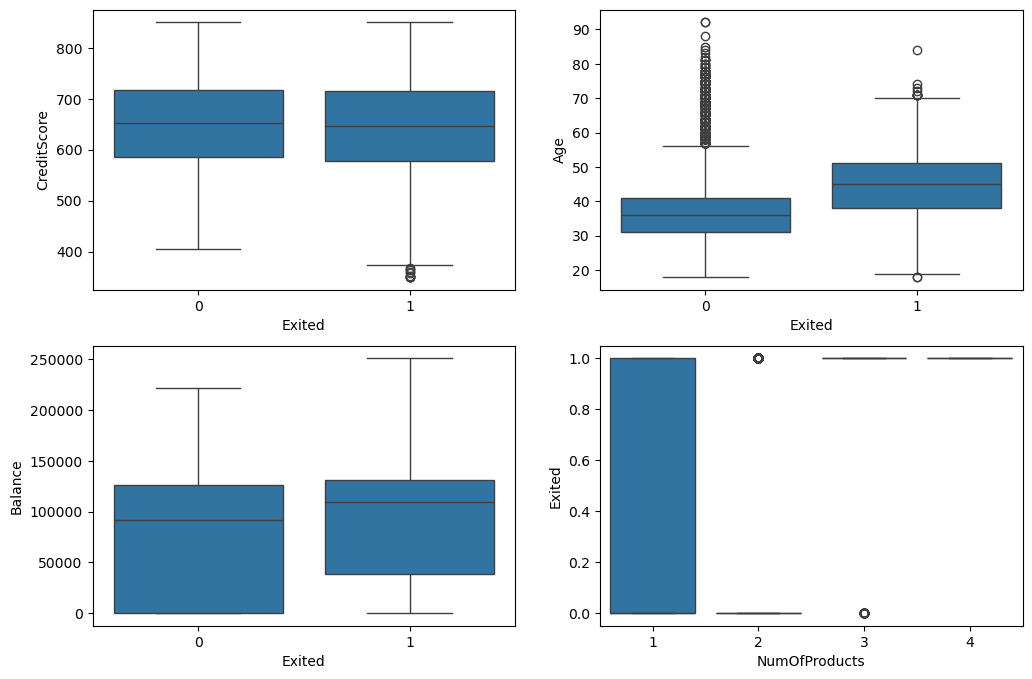

In [27]:
fig,axes = plt.subplots(2,2,figsize=(12,8))
sns.boxplot(x = 'Exited',y='CreditScore',data=df,ax =axes[0,0])
sns.boxplot(x = 'Exited',y='Age',data=df,ax =axes[0,1])
sns.boxplot(x = 'Exited',y='Balance',data=df,ax =axes[1,0])
sns.boxplot(x = 'NumOfProducts',y='Exited',data=df,ax =axes[1,1])

In [29]:
pd.crosstab(df['Geography'],df['Exited'],normalize='index')

Exited,0,1
Geography,,
France,0.838452,0.161548
Germany,0.675568,0.324432
Spain,0.833266,0.166734


In [35]:
pd.set_option('display.max_columns',50)

Text(0.5, 1.0, 'Churn by Age Group')

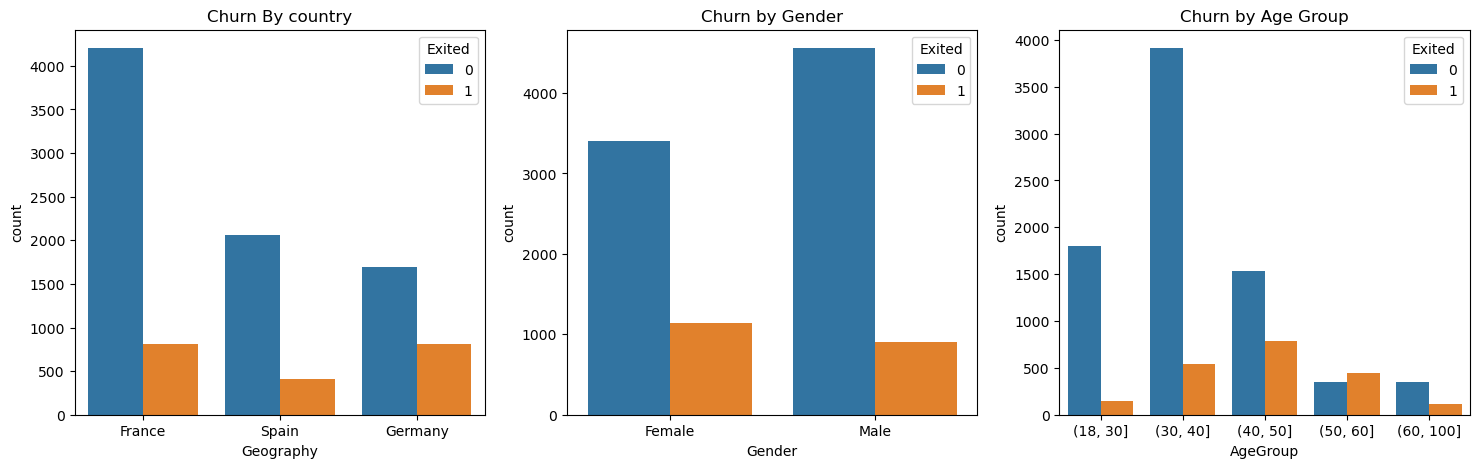

In [53]:
fig,axes = plt.subplots(1,3,figsize=(18,5))

sns.countplot(x='Geography',hue='Exited',data=df,ax=axes[0])
axes[0].set_title('Churn By country')

sns.countplot(x='Gender', hue='Exited', data=df, ax=axes[1])
axes[1].set_title("Churn by Gender")

df['AgeGroup'] = pd.cut(df['Age'], bins=[18, 30, 40, 50, 60, 100])
sns.countplot(x='AgeGroup', hue='Exited', data=df, ax=axes[2])
axes[2].set_title("Churn by Age Group")


(0.0, 1.0, 0.0, 1.0)

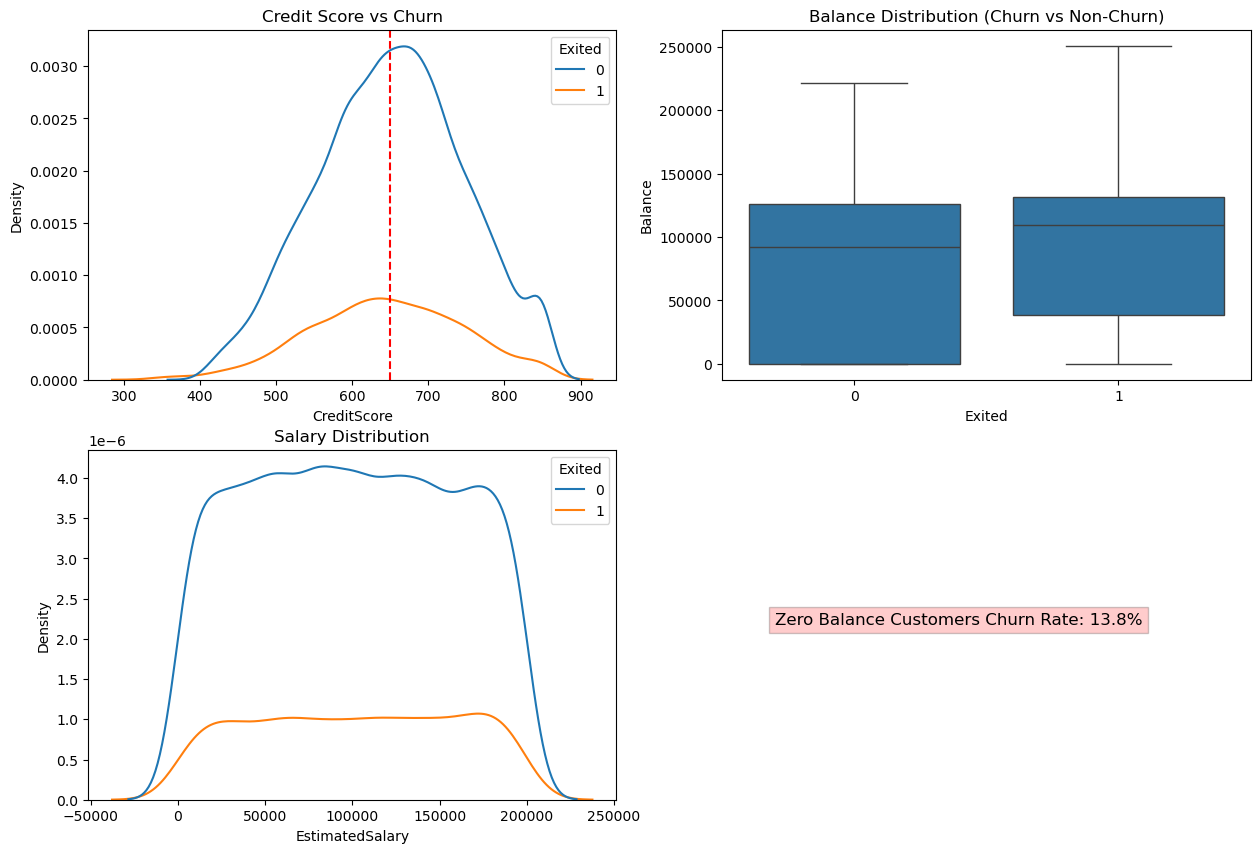

In [67]:
# 3. Financial Behavior

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Credit Score Distribution
sns.kdeplot(x='CreditScore', hue='Exited', data=df, ax=axes[0,0])
axes[0,0].axvline(650, color='red', linestyle='--', label='Risk Threshold')
axes[0,0].set_title("Credit Score vs Churn")

# Balance Analysis
sns.boxplot(x='Exited', y='Balance', data=df, ax=axes[0,1])
axes[0,1].set_title("Balance Distribution (Churn vs Non-Churn)")

# Salary vs Churn
sns.kdeplot(x='EstimatedSalary', hue='Exited', data=df, ax=axes[1,0])
axes[1,0].set_title("Salary Distribution")

# Zero Balance Customers
zero_balance_churn = df[df['Balance']==0]['Exited'].mean()
axes[1,1].text(0.1, 0.5, f"Zero Balance Customers Churn Rate: {zero_balance_churn:.1%}", 
               fontsize=12, bbox=dict(facecolor='red', alpha=0.2))
axes[1,1].axis('off')

Text(0.5, 1.0, 'Activity Status vs Churn')

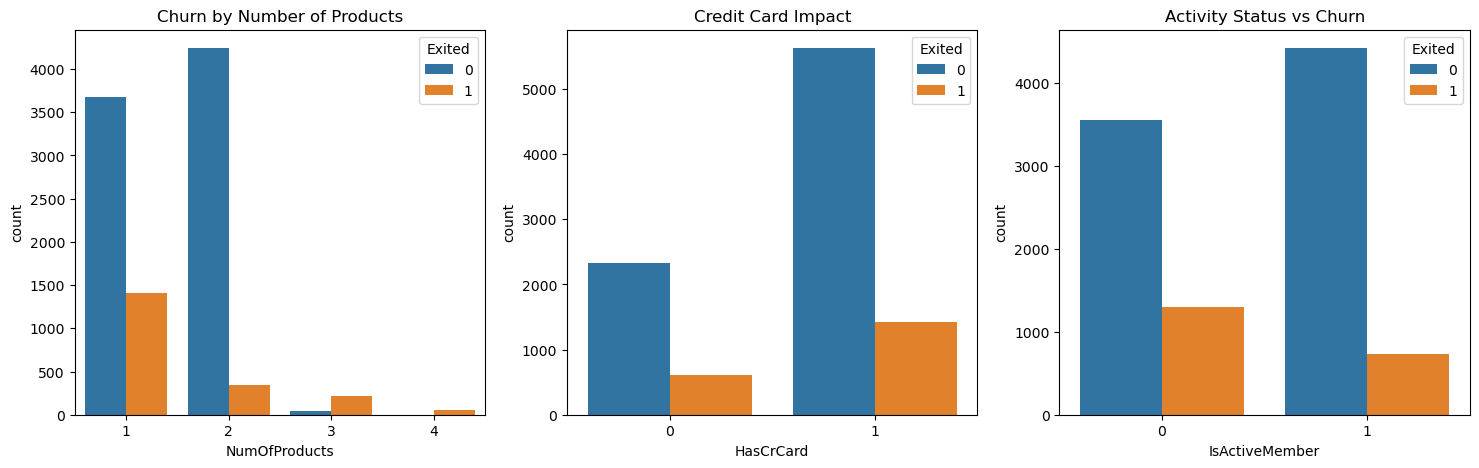

In [71]:
# 4. Product & Activity Insights
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Product Count
sns.countplot(x='NumOfProducts', hue='Exited', data=df, ax=axes[0])
axes[0].set_title("Churn by Number of Products")

# Credit Card Holders
sns.countplot(x='HasCrCard', hue='Exited', data=df, ax=axes[1])
axes[1].set_title("Credit Card Impact")

# Active Members
sns.countplot(x='IsActiveMember', hue='Exited', data=df, ax=axes[2])
axes[2].set_title("Activity Status vs Churn")


Text(0.5, 1.0, 'Churn Risk by Tenure (Years with Bank)')

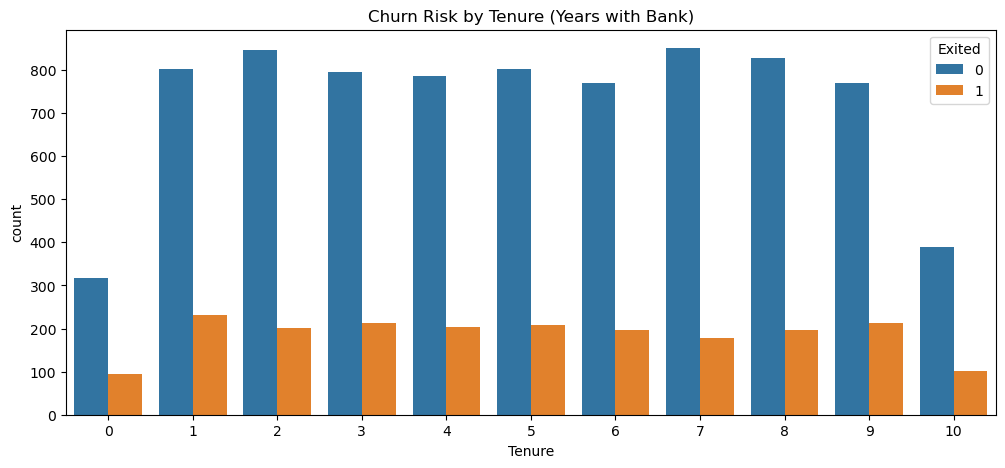

In [73]:
# 5. Tenure-Based Patterns
plt.figure(figsize=(12, 5))
sns.countplot(x='Tenure', hue='Exited', data=df)
plt.title("Churn Risk by Tenure (Years with Bank)")


Text(0.5, 1.0, 'Feature Correlations with Churn')

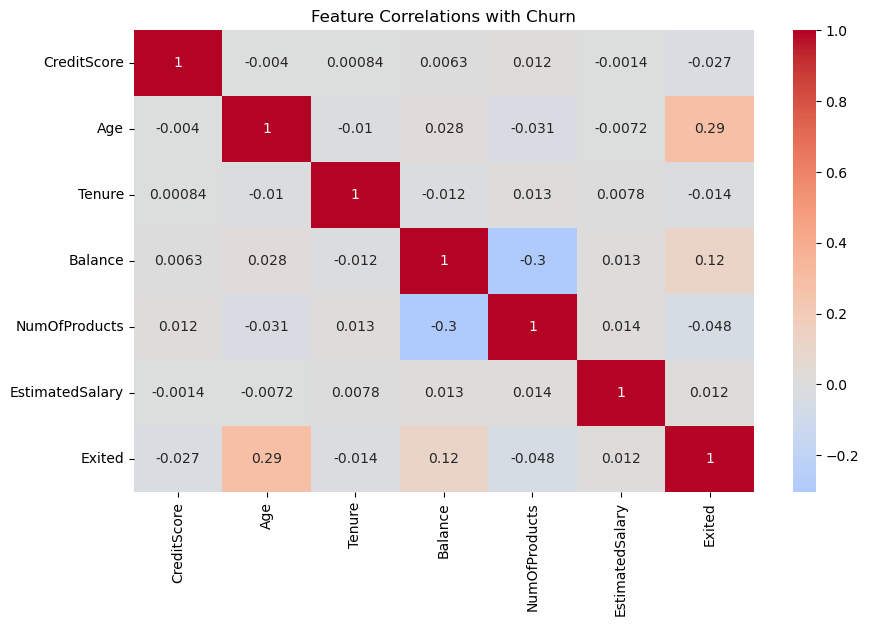

In [75]:
# 6. Correlation Heatmap (Numerical Features)
num_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
plt.figure(figsize=(10, 6))
sns.heatmap(df[num_features + ['Exited']].corr(), annot=True, cmap='coolwarm', center=0)
plt.title("Feature Correlations with Churn")